In [ ]:
# %load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pendulum as pen

from neural_networks.Model import NNRegressor
from neural_networks.nn_utils import SaveBestModelCallback

In [115]:
path_modesl = '../models/' 
model_path = path_modesl + pen.now().to_datetime_string()
random_state = 42
train_test_vali_split = [0.7, 0.15, 0.15]

In [116]:
data = pd.data = (
    pd.read_csv('../data/energydata_complete.csv')
    .drop(['date', 'rv1', 'rv2'], axis=1)
    .assign(target = lambda k: k.lights + k.Appliances)
    .drop(['lights', 'Appliances'], axis=1)
)

### Traint, test and validation split

In [117]:
X_train, X_rest, y_train, y_rest = train_test_split(
    data.drop('target', axis=1),
    data.target,
    test_size=1 - train_test_vali_split[0],
    random_state=random_state
)

X_test, X_val, y_test, y_val = train_test_split(
    X_rest,
    y_rest,
    test_size=(
        train_test_vali_split[2] 
        / (train_test_vali_split[1] + train_test_vali_split[2])
    ),
    random_state=random_state
)

In [118]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [134]:
model = NNRegressor(activation="tanh", input_shape=500)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
    loss='mse'
)

In [135]:
es = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=10
)

In [136]:
mc = SaveBestModelCallback(
    threshold=4700,
    filepath=model_path,
    monitor_metric='val_loss',
)

In [137]:
history = model.fit(
    X_train, y_train,
    epochs=400,
    validation_data=(X_val, y_val),
    use_multiprocessing=True,
    callbacks = [es, mc]
)

Epoch 1/400


432/432 [==============================] - 1s 1ms/step - loss: 11174.8584 - val_loss: 10664.1934
Epoch 2/400
432/432 [==============================] - 1s 1ms/step - loss: 9371.9062 - val_loss: 10321.3174
Epoch 3/400
432/432 [==============================] - 1s 1ms/step - loss: 9108.7617 - val_loss: 10198.9219
Epoch 4/400
432/432 [==============================] - 1s 1ms/step - loss: 8877.9443 - val_loss: 10363.1201
Epoch 5/400
432/432 [==============================] - 1s 1ms/step - loss: 8691.2803 - val_loss: 9886.5928
Epoch 6/400
432/432 [==============================] - 1s 1ms/step - loss: 8561.3926 - val_loss: 9831.4795
Epoch 7/400
432/432 [==============================] - 1s 1ms/step - loss: 8377.6572 - val_loss: 9566.9150
Epoch 8/400
432/432 [==============================] - 0s 1ms/step - loss: 8197.0029 - val_loss: 9461.5283
Epoch 9/400
432/432 [==============================] - 0s 1ms/step - loss: 8073.7017 - val_loss: 9472.0410
Epoch 10/400
432/432 [======================

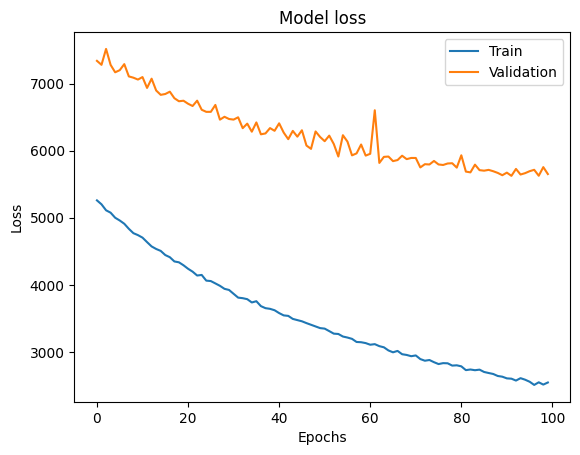

In [142]:
### Plot training and validation loss
plt.plot(history.history['loss'][-100:])
plt.plot(history.history['val_loss'][-100:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [140]:
# compute r2 score
from sklearn.metrics import r2_score
# train
y_pred_train = model.predict(X_train)
# validation
y_pred_val = model.predict(X_val)
# test
y_pred_test = model.predict(X_test)

r2_score(y_train, y_pred_train), r2_score(y_val, y_pred_val), r2_score(y_test, y_pred_test)

  1/432 [..............................] - ETA: 13s

93/93 [==============================] - 0s 746us/step


(0.7801086647884503, 0.5464868356240079, 0.4840040988140353)

In [ ]:
# plot real vs predicted
plt.scatter(y_test, y_pred_test)
max_size = max(y_test.max(), y_pred_test.max())
plt.plot([0, max_size], [0, max_size], 'k--')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

# plot real vs predicted
plt.scatter(y_train, y_pred_train)
max_size = max(y_train.max(), y_pred_train.max())
plt.plot([0, max_size], [0, max_size], 'k--')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

# plot real vs predicted
plt.scatter(y_val, y_pred_val)
max_size = max(y_val.max(), y_pred_val.max())
plt.plot([0, max_size], [0, max_size], 'k--')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()